# **Predicting Heart Disease using Machine Learning**

**This notebook works out ways to classify whether a person has a heart related disease or not using Python-based machine learing and Data Science**


**This will be the approach towards the project:**
1. Problem Definition
2. Data 
3. Evaluation 
4. Features 
5. Model Training 
6. Experimentation using the trained model

## **1. Problem Definition :**

> #### *Given clinical parameters about a patient, is it possible to predict whether the patient has a heart related disease or not?*

## **2. Data :**

>**The original data is from Cleveland, Hungary, Switzerland, and the VA Long Beach from the UCI Machine Learning Library : https://archive.ics.uci.edu/dataset/45/heart+disease**
>
>**The actual data file to be used is present on Kaggle : https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data**

## **3. Evaluation**

>**The project will be evaluated and modelled in a way that it will have a minimum prediction accuracy of 85%.**

## **4. Features**

**Information about each `Feature` is present below :**


1. **age** - Age in years

2. **sex** - (1 = male; 0 = female)

3. **cp** - Chest pain type:
   - 0: Typical angina - chest pain related to a decrease in blood supply to the heart
   - 1: Atypical angina - chest pain not related to the heart
   - 2: Non-anginal pain - typically esophageal spasms (non-heart related)
   - 3: Asymptomatic - chest pain not showing signs of disease

4. **trestbps** - Resting blood pressure (in mm Hg on admission to the hospital)
   - Anything above 130-140 is typically cause for concern

5. **chol** - Serum cholesterol in mg/dl:
   - Serum = LDL + HDL + 0.2 * triglycerides
   - Levels above 200 are cause for concern

6. **fbs** - Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
   - '>126 mg/dL' signals diabetes

7. **restecg** - Resting electrocardiographic results:
   - 0: Nothing to note
   - 1: ST-T Wave abnormality (can range from mild symptoms to severe problems; signals non-normal heartbeat)
   - 2: Possible or definite left ventricular hypertrophy (enlarged heart's main pumping chamber)

8. **thalach** - Maximum heart rate achieved

9. **exang** - Exercise induced angina (1 = yes; 0 = no)

10. **oldpeak** - ST depression induced by exercise relative to rest:
    - Looks at the stress on the heart during exercise
    - An unhealthy heart will stress more

11. **slope** - The slope of the peak exercise ST segment:
    - 0: Upsloping - better heart rate with exercise (uncommon)
    - 1: Flatsloping - minimal change (typical healthy heart)
    - 2: Downsloping - signs of an unhealthy heart

12. **ca** - Number of major vessels (0-3) colored by fluoroscopy:
    - Colored vessel means the doctor can see blood passing through
    - More blood movement = better (no clots)

13. **thal** - Thalium stress test result:
    - 1, 3: Normal
    - 6: Fixed defect - used to have a defect but is okay now
    - 7: Reversible defect - no proper blood movement when exercising

14. **target** - Presence of heart disease (1 = yes; 0 = no)


## **Preparing the tools**

**The libraries used in this project are : Seaborn, Matplotlib, Numpy and Pandas for data preprocessing**

In [1]:
# Regular EDA and plotting libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

## Models
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay 
import warnings
warnings.filterwarnings('ignore')


## **Load Data**

In [2]:
df = pd.read_csv('heart-disease.csv', on_bad_lines='skip')


### **Exploratory Data Analysis (EDA)**

**The dataset will be explored to find the meaning, relations, incompleteness and reliability of all the features present in the dataset.**

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

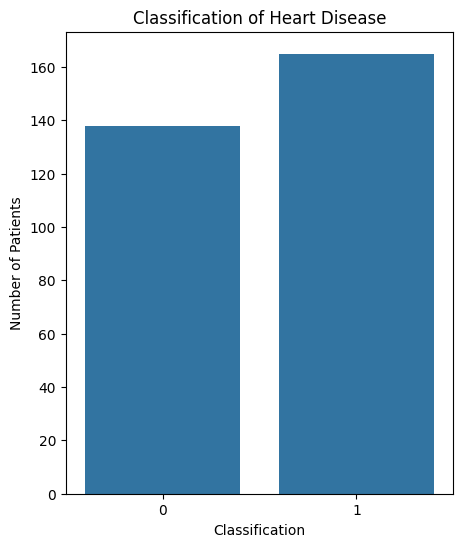

In [5]:
fig, ax = plt.subplots(figsize = (5,6))
sns.barplot(df['target'].value_counts())
plt.xlabel('Classification')
plt.ylabel('Number of Patients')
plt.title('Classification of Heart Disease')
plt.show()


**There are relatively similar amount of values in both classes, so this will be a balanced classification.**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
df['sex'].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [10]:
pd.crosstab(df['target'], df['sex'])

sex,0,1
target,,
0,24,114
1,72,93


In [11]:
men_percentage = (93 / (114 + 93)) * 100
women_percentage = (72 / (24+72)) * 100
print(men_percentage)
print(women_percentage)

44.927536231884055
75.0


**This shows that the percentage of Heart Disease being present in Men is 44.9275% but is 75% for women.**

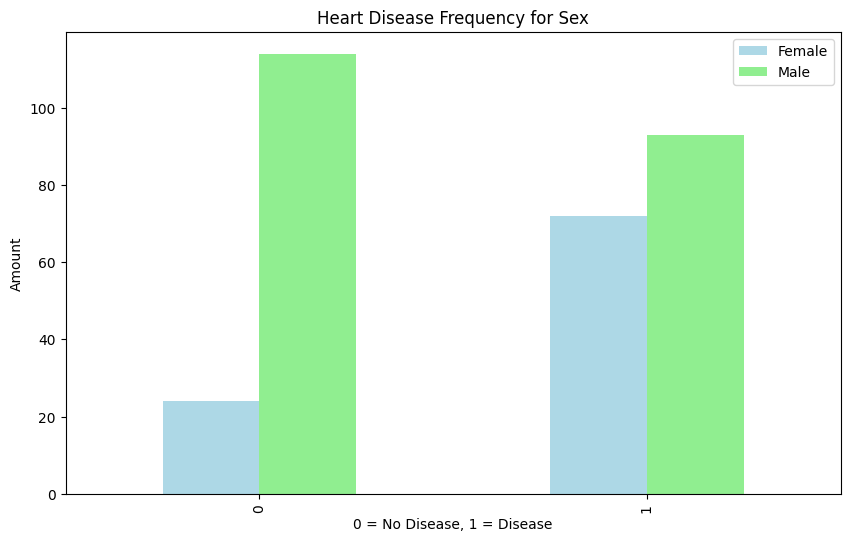

In [12]:
pd.crosstab(df['target'], df['sex']).plot(kind="bar", figsize=(10,6), color=["lightblue", "lightgreen"])

plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.show()

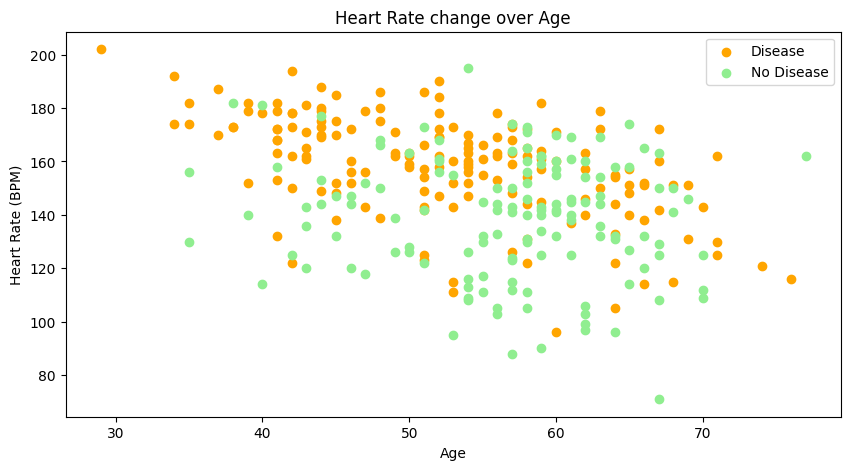

In [13]:
plt.figure(figsize = (10,5))
plt.scatter(df['age'][df['target']==1], df['thalach'][df['target']==1], c = 'orange')
plt.scatter(df['age'][df['target']==0], df['thalach'][df['target']==0], c = 'lightgreen')
plt.xlabel('Age')
plt.ylabel('Heart Rate (BPM)')
plt.title('Heart Rate change over Age')
plt.legend(['Disease', 'No Disease'])
plt.show();

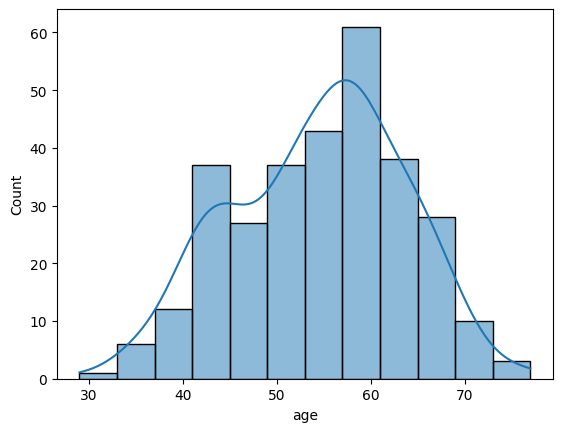

In [14]:
sns.histplot(df['age'], kde = True)
plt.show();

**The distribution of ages is similar to the Bell curve/Normal Distribution/Gaussian Distribution.**

## **Visualizing Correlations in the features of the dataset using a Correlation Heatmap:**

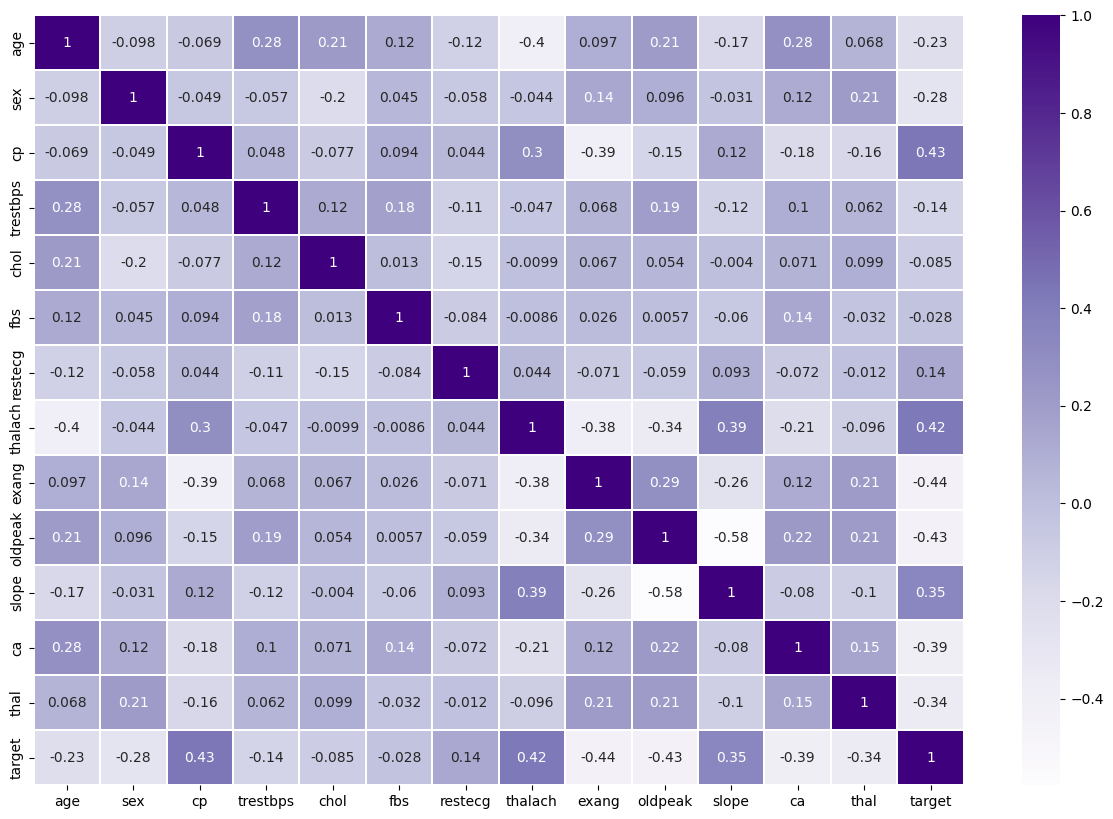

In [15]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True,cmap = 'Purples', linewidths=0.3)
plt.show()

## **5. Choosing a Model and Training it for prediction**

### **The models which will be tried and evaluated are:**

### 1. **LinearSVC**

**Mathematical Formula:**

$$
\min_{w,b} \ \frac{1}{2} ||w||^2 \ \ \text{subject to} \ \ y_i (w^T x_i + b) \geq 1 \ \ \text{for all} \ i
$$

- **Explanation**: **`LinearSVC` (Linear Support Vector Classification) aims to find the optimal hyperplane that maximizes the margin between different classes. The goal is to minimize the norm of the weight vector \( w \), which controls the margin size, while ensuring that each data point \( x_i \) is correctly classified. The constraint \( y_i (w^T x_i + b) \geq 1 \) ensures that points are on the correct side of the margin.**

---

### 2. **LogisticRegression**

**Mathematical Formula:**

$$
P(y=1 | x) = \frac{1}{1 + e^{-(w^T x + b)}}
$$

**Cost Function (Log-Loss):**

$$
J(w, b) = - \frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(h_w(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_w(x^{(i)})) \right]
$$

- **Explanation**: **`LogisticRegression` models the probability that a given input \( x \) belongs to class 1 using the sigmoid function. The cost function (Log-Loss) measures how well the predicted probabilities match the actual labels, penalizing incorrect predictions more severely. The model minimizes this cost function to find the optimal weights \( w \) and bias \( b \).**

---

### 3. **K-Nearest Neighbors (KNN)**

**Mathematical Formula:**

1. **Distance Calculation**:

   For a given query point \( x \), calculate the distance to each training point \( x_i \):

   $$
   d(x, x_i) = \sqrt{\sum_{j=1}^{n} (x_j - x_{i,j})^2}
   $$

   where \( n \) is the number of features.

2. **Classification**:

   The label of \( x \) is determined by the majority vote among the \( k \)-nearest neighbors:

   $$
   \hat{y} = \text{mode} \left( y_{(k)} \right)
   $$

   where \( y_{(k)} \) represents the labels of the \( k \) closest neighbors.

- **Explanation**: **`K-Nearest Neighbors` classifies a data point based on the majority label among its \( k \) nearest neighbors. The distance between points is typically computed using Euclidean distance, though other distance metrics can be used. The algorithm determines the nearest neighbors and assigns the class that is most frequent among those neighbors.**


---


### 4. **RandomForestClassifier**

**Mathematical Formula:**

$$
\hat{y} = \text{mode} \left( T_1(x), T_2(x), ..., T_n(x) \right)
$$

- **Explanation**: **`RandomForestClassifier` is an ensemble method that constructs multiple decision trees during training and outputs the class that is the mode of the classes predicted by individual trees. Each decision tree is trained on a random subset of the data, which improves the model's accuracy and robustness by reducing variance and avoiding overfitting.**


In [16]:
X = df.drop('target', axis=1)
y = df['target']

### **Now we split our data into a train and test split**

**The reason we do this is because we can find the accuracy better when we test the data based on entities it has not seen before, i.e. entities which were not present in the data on which the model was trained**

**Here the training data will be 80% of the total data and testing data will be 20%**

In [17]:
np.random.seed(42)  #To maintain consistency in the split sets.

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [18]:
len(X_train), len(y_train)

(242, 242)

#### **Defining a function to fit and evaluate the models at once**

In [19]:
models = {"Linear SVC" : LinearSVC(), 
           "Logistic Regression" : LogisticRegression(n_jobs=-1),
           "K-Nearest Neighbors" : KNeighborsClassifier(n_jobs=-1,n_neighbors=3 ),
           "Random Forest Classifier" : RandomForestClassifier(n_jobs=-1,n_estimators=1000)}

def fit_evaluate(models, X_trainf = X_train,X_testf = X_test,y_trainf =y_train ,y_testf=y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : targets for training data
    y_test : targets for test data
    """ 
    np.random.seed(42)
    models_score={}
    
    for name, model in models.items():
        model.fit(X_trainf,y_trainf)
        models_score[name] = model.score(X_testf,y_testf)
    
    return models_score


In [20]:
model_scores = fit_evaluate(models)
print(model_scores)

/home/smayan/Desktop/AI-ML-DS/AI-and-ML-Course/.conda/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Linear SVC': 0.8688524590163934, 'Logistic Regression': 0.8852459016393442, 'K-Nearest Neighbors': 0.6557377049180327, 'Random Forest Classifier': 0.8688524590163934}


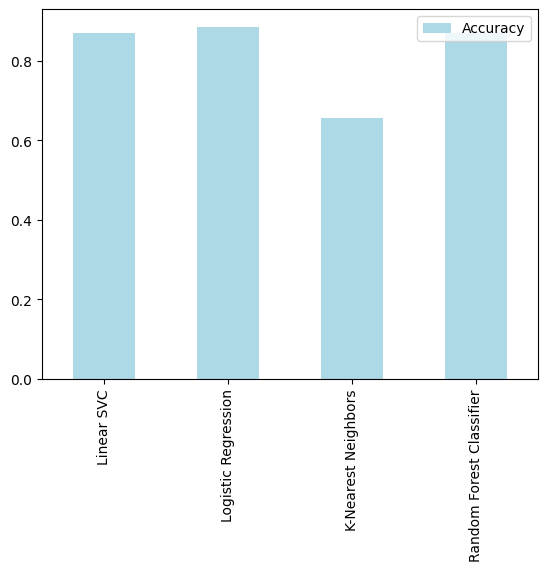

In [21]:
compare = pd.DataFrame(model_scores, index=["Accuracy"])
compare.T.plot.bar(color='lightblue');
plt.xticks = 902
plt.show();

### **This might make Logistic Regression look like the best option but there are more evaluation metrics to consider before finalizing on the model.**

#### **Metrics to be considered :**
* Hyperparameter Tuning
* Feature importance
* Confusion Matrix
* Cross Validation
* Precision
* Recall
* F1 score
* Classification Report*. ROC Curve
* Area under ROC curve

### **Hyperparameter Tuning:**

##### **K-Nearest Neighbors Tuning**

In [22]:
train_scores = []
test_scores = []
knn = KNeighborsClassifier()
neighbors = range(1, 21) 

for i in neighbors:
    knn.set_params(n_neighbors = i)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

In [23]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

Maximum KNN score on the test data: 0.75410


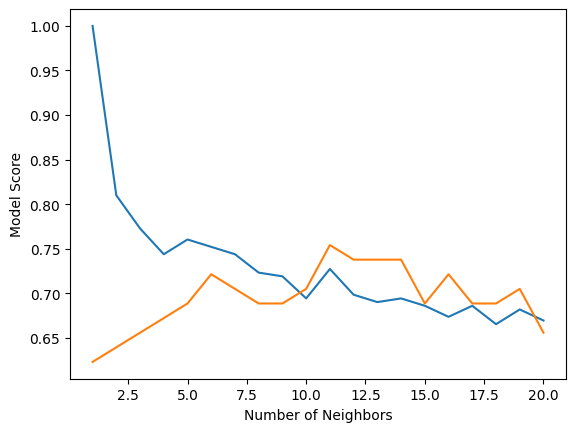

In [24]:
print(f"Maximum KNN score on the test data: {max(test_scores):.5f}")
plt.plot(neighbors, train_scores, label="Train Score")
plt.plot(neighbors, test_scores,label="Test Score")
plt.xlabel('Number of Neighbors')
plt.ylabel('Model Score')
plt.show();

### **Hyperparameter Tuning**

**We are going to tune our models using `RandomizedSearchCV`:**
1. Logistic Regression
2. RandomForestClassifier

##### **Tuning Logistic Regression**

In [25]:
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

**Now we tune the models based on the hyperparameter grid above using `RandomizedSearchCV()`**

In [26]:
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv = 5,
                                n_iter=20,
                                verbose=True)
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [27]:
rs_log_reg.best_params_


{'solver': 'liblinear', 'C': 0.23357214690901212}

In [28]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

##### **Tuning RandomForestClassifier**

In [29]:
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

rs_rf.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [30]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [31]:
rs_rf.score(X_test, y_test)

0.8688524590163934

In [32]:
model_scores

{'Linear SVC': 0.8688524590163934,
 'Logistic Regression': 0.8852459016393442,
 'K-Nearest Neighbors': 0.6557377049180327,
 'Random Forest Classifier': 0.8688524590163934}

#### **Since searching for parameters did not work in `RandomizedSearchCV` we will now use `GridSearchCV()`**

**This method is exhaustive so it will only be performed on LogisticRegression(), which has given the best results till now.**

In [33]:
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [34]:
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [35]:
gs_log_reg.score(X_test, y_test)

0.8852459016393442

### **We will need to add more Hyperparameters to consider to level up our model, there have been as good as no changes after using RandomizedSearchCV and GridSearchCV**

In [36]:
log_reg_grid = {
    "C": np.logspace(-4, 4, 20),  
    "max_iter": [5000, 8000, 10000]
}

# Initialize GridSearchCV
log_reg_gs2 = GridSearchCV(estimator=LogisticRegression(),
                           param_grid=log_reg_grid,
                           cv=5,  # 5-fold cross-validation
                           verbose=1,  # Show progress
                           n_jobs=-1)  # Use all available core
log_reg_gs2.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'max_iter': [5000, 8000, 10000]},
             verbose=1)

In [37]:
log_reg_gs2.best_params_

{'C': 4.281332398719396, 'max_iter': 5000}

In [38]:
log_reg_gs2.score(X_test,y_test)

0.8524590163934426

#### **Since we are not profiting from tuning hyperparameters for LogisticRegression(), we will give it one last try performing GridSearchCV() on LinearSVC()**

In [39]:
svc_grid = {
    "C": np.logspace(-4, 4, 20),    
    "max_iter": [5000, 7000, 8000],  
}

In [40]:
linearsvc_gs = GridSearchCV(estimator=LinearSVC(),
                           param_grid=svc_grid,
                           cv=5,  # 5-fold cross-validation
                           verbose=1,  # Show progress
                           n_jobs=-1)  # Use all available cores

linearsvc_gs.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5, estimator=LinearSVC(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'max_iter': [5000, 7000, 8000]},
             verbose=1)

In [41]:
linearsvc_gs.score(X_test,y_test)

0.8852459016393442

##### **There is no profit from here so we will just continue forward with LinearRegression().**

### **Evaluating a classification model, beyond accuracy**

**Now we've got a tuned model, let's get some of the metrics we discussed before.**

We want:

* ROC curve and AUC score - RocCurveDisplay()
* Confusion matrix - confusion_matrix()
* Classification report - classification_report()
* Precision - precision_score()
* Recall - recall_score()
* F1-score - f1_score()


In [42]:
y_predslr = gs_log_reg.predict(X_test)
y_predslr

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [43]:
y_predsrf = rs_rf.predict(X_test)
y_predsrf

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

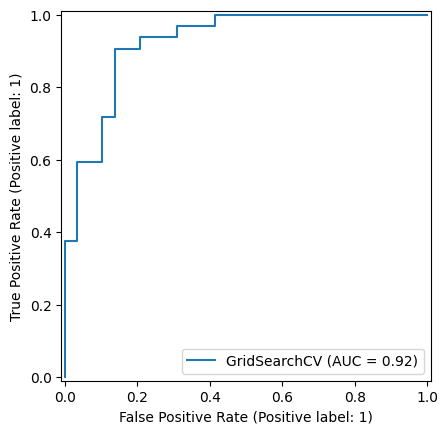

In [44]:
RocCurveDisplay.from_estimator(estimator=gs_log_reg, 
                               X=X_test, 
                               y=y_test); 
plt.show();

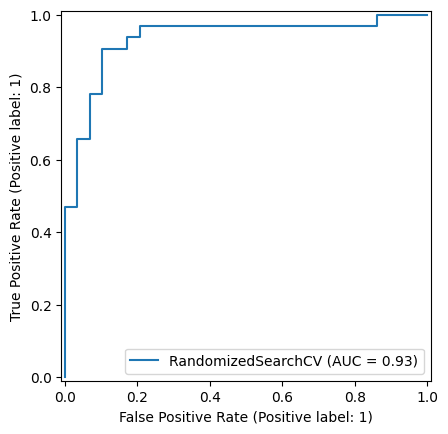

In [45]:
RocCurveDisplay.from_estimator(estimator=rs_rf, 
                               X=X_test, 
                               y=y_test); 
plt.show();

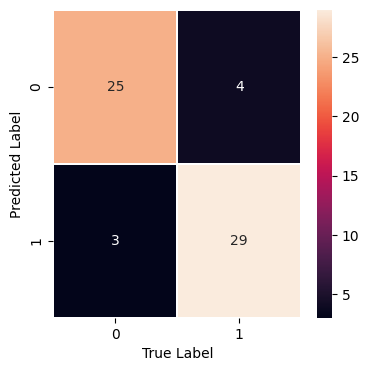

In [46]:
def plot_conf_mat(y_test, y_preds):
    plt.subplots(figsize=(4, 4))
    sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     linewidths=0.2)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")
    plt.show();
    
plot_conf_mat(y_test, y_predslr)

* **In this case there are 4 False Negative values and 3 False Positive values**

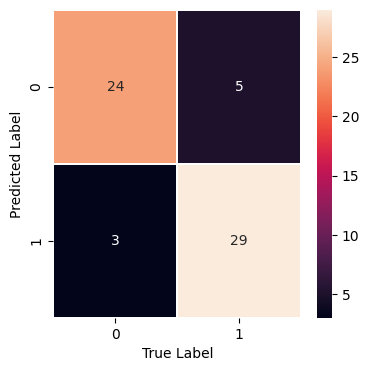

In [47]:
plot_conf_mat(y_test, y_predsrf)

* **In this case there are 5 False Negative values and 3 False Positive values**

#### **Now that we have a ROC curve adn an AUC value, we will create a classification report(which will provide us with all necessary evaluation metrics) and cross-validated precision.**

#### **The meanings of the parameters are as follows:**

**Precision:**

$$
\text{Precision} = \frac{TP}{TP + FP}
$$

- **Explanation**: Precision measures the accuracy of positive predictions. It calculates the ratio of correctly predicted positive instances (True Positives) to the total predicted positives (True Positives + False Positives). High precision indicates a low false positive rate.

---

**Recall (Sensitivity or True Positive Rate):**

$$
\text{Recall} = \frac{TP}{TP + FN}
$$

- **Explanation**: Recall measures the ability of the model to identify all relevant instances. It calculates the ratio of correctly predicted positive instances (True Positives) to the actual positives (True Positives + False Negatives). High recall means most positive cases are identified.

---

**F1-Score:**

$$
F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$$

- **Explanation**: The F1-score is the harmonic mean of precision and recall. It provides a single score that balances both precision and recall, especially useful when you want to seek a balance between the two.

**Where:**

* TP = True Positives
* FP = False Positives
* FN = False Negatives


In [48]:
print(classification_report(y_predslr, y_test))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88        28
           1       0.91      0.88      0.89        33

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.88        61
weighted avg       0.89      0.89      0.89        61



In [49]:
print(classification_report(y_predsrf, y_test))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86        27
           1       0.91      0.85      0.88        34

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



#### **Now we will evaluate our best model according to the best parameters set and using cross validation techniques to get a better idea of the evaluation metrics of the model**
**The parameters to check are:**
1. **Accuracy**
2. **Precision**
3. **Recall**
4. **F-1 Score**

In [50]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [51]:
clf = LogisticRegression(C=0.23357214690901212,
                         solver="liblinear")

In [52]:
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5, 
                         scoring="accuracy") 
cv_acc


array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [53]:
cv_acc = np.mean(cv_acc)
cv_acc


0.8479781420765027

In [54]:
cv_precision = np.mean(cross_val_score(clf,
                                       X,
                                       y,
                                       cv=5, 
                                       scoring="precision")) 
cv_precision

0.8215873015873015

In [55]:
cv_recall = np.mean(cross_val_score(clf,
                                    X,
                                    y,
                                    cv=5, 
                                    scoring="recall"))
cv_recall


0.9272727272727274

In [56]:
cv_f1 = np.mean(cross_val_score(clf,
                                X,
                                y,
                                cv=5, 
                                scoring="f1")) 
cv_f1

0.8705403543192143

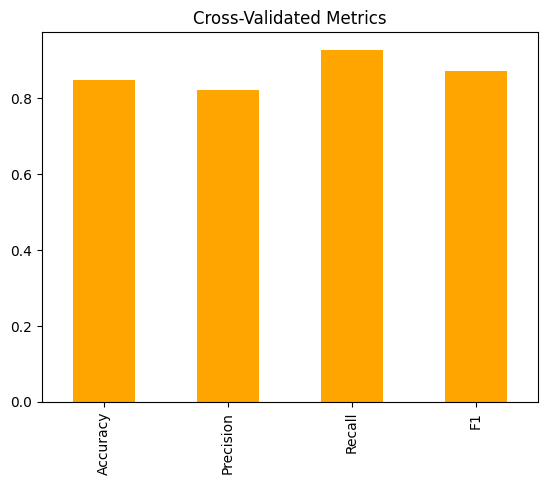

In [57]:
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                            "Precision": cv_precision,
                            "Recall": cv_recall,
                            "F1": cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False, color='orange');
plt.show();

### **Finding the most importance feature in the dataset**

* **To do so, we'll use the coef_ attribute.**
* **We can access the coef_ attribute after we've fit an instance of LogisticRegression.**

In [58]:
clf.fit(X_train, y_train);

In [59]:
clf.coef_

array([[ 0.00369922, -0.9042409 ,  0.67472826, -0.0116134 , -0.00170364,
         0.04787688,  0.33490198,  0.02472938, -0.63120406, -0.5759095 ,
         0.47095141, -0.65165348, -0.69984208]])

In [60]:
features_dict = dict(zip(df.columns, list(clf.coef_[0])))
features_dict

{'age': 0.003699220776580221,
 'sex': -0.9042409028785717,
 'cp': 0.6747282587404362,
 'trestbps': -0.011613401339975146,
 'chol': -0.0017036439067759743,
 'fbs': 0.047876881148997324,
 'restecg': 0.3349019815885189,
 'thalach': 0.02472938284108309,
 'exang': -0.6312040612837573,
 'oldpeak': -0.5759095045469952,
 'slope': 0.4709514073081419,
 'ca': -0.6516534770577476,
 'thal': -0.6998420764664995}

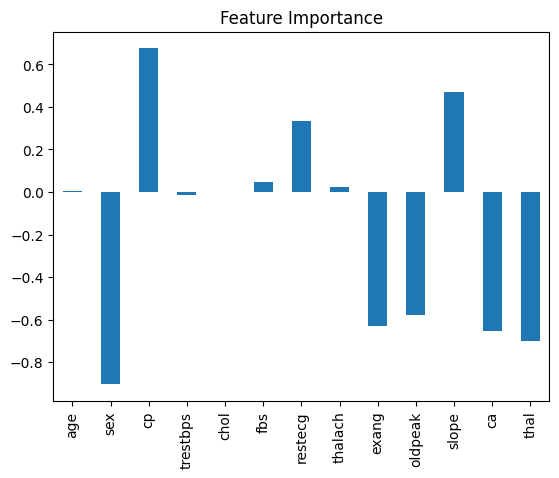

In [61]:
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False);
plt.show();

* **From a purely technical analysis, `cp` is the most useful feature in the dataset for prediction.**
 
 * **cp** - Chest pain type:
   - 0: Typical angina - chest pain related to a decrease in blood supply to the heart
   - 1: Atypical angina - chest pain not related to the heart
   - 2: Non-anginal pain - typically esophageal spasms (non-heart related)
   - 3: Asymptomatic - chest pain not showing signs of disease

In [62]:
import pickle

In [63]:
pickle.dump(clf, open('model.pkl','wb'))